## **Tugas Praktikum**

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 

In [20]:
# Jawaban

# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# load data
df = pd.read_csv('./data/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [21]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

C:\Users\Alivan\AppData\Local\Temp\ipykernel_3456\307805129.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


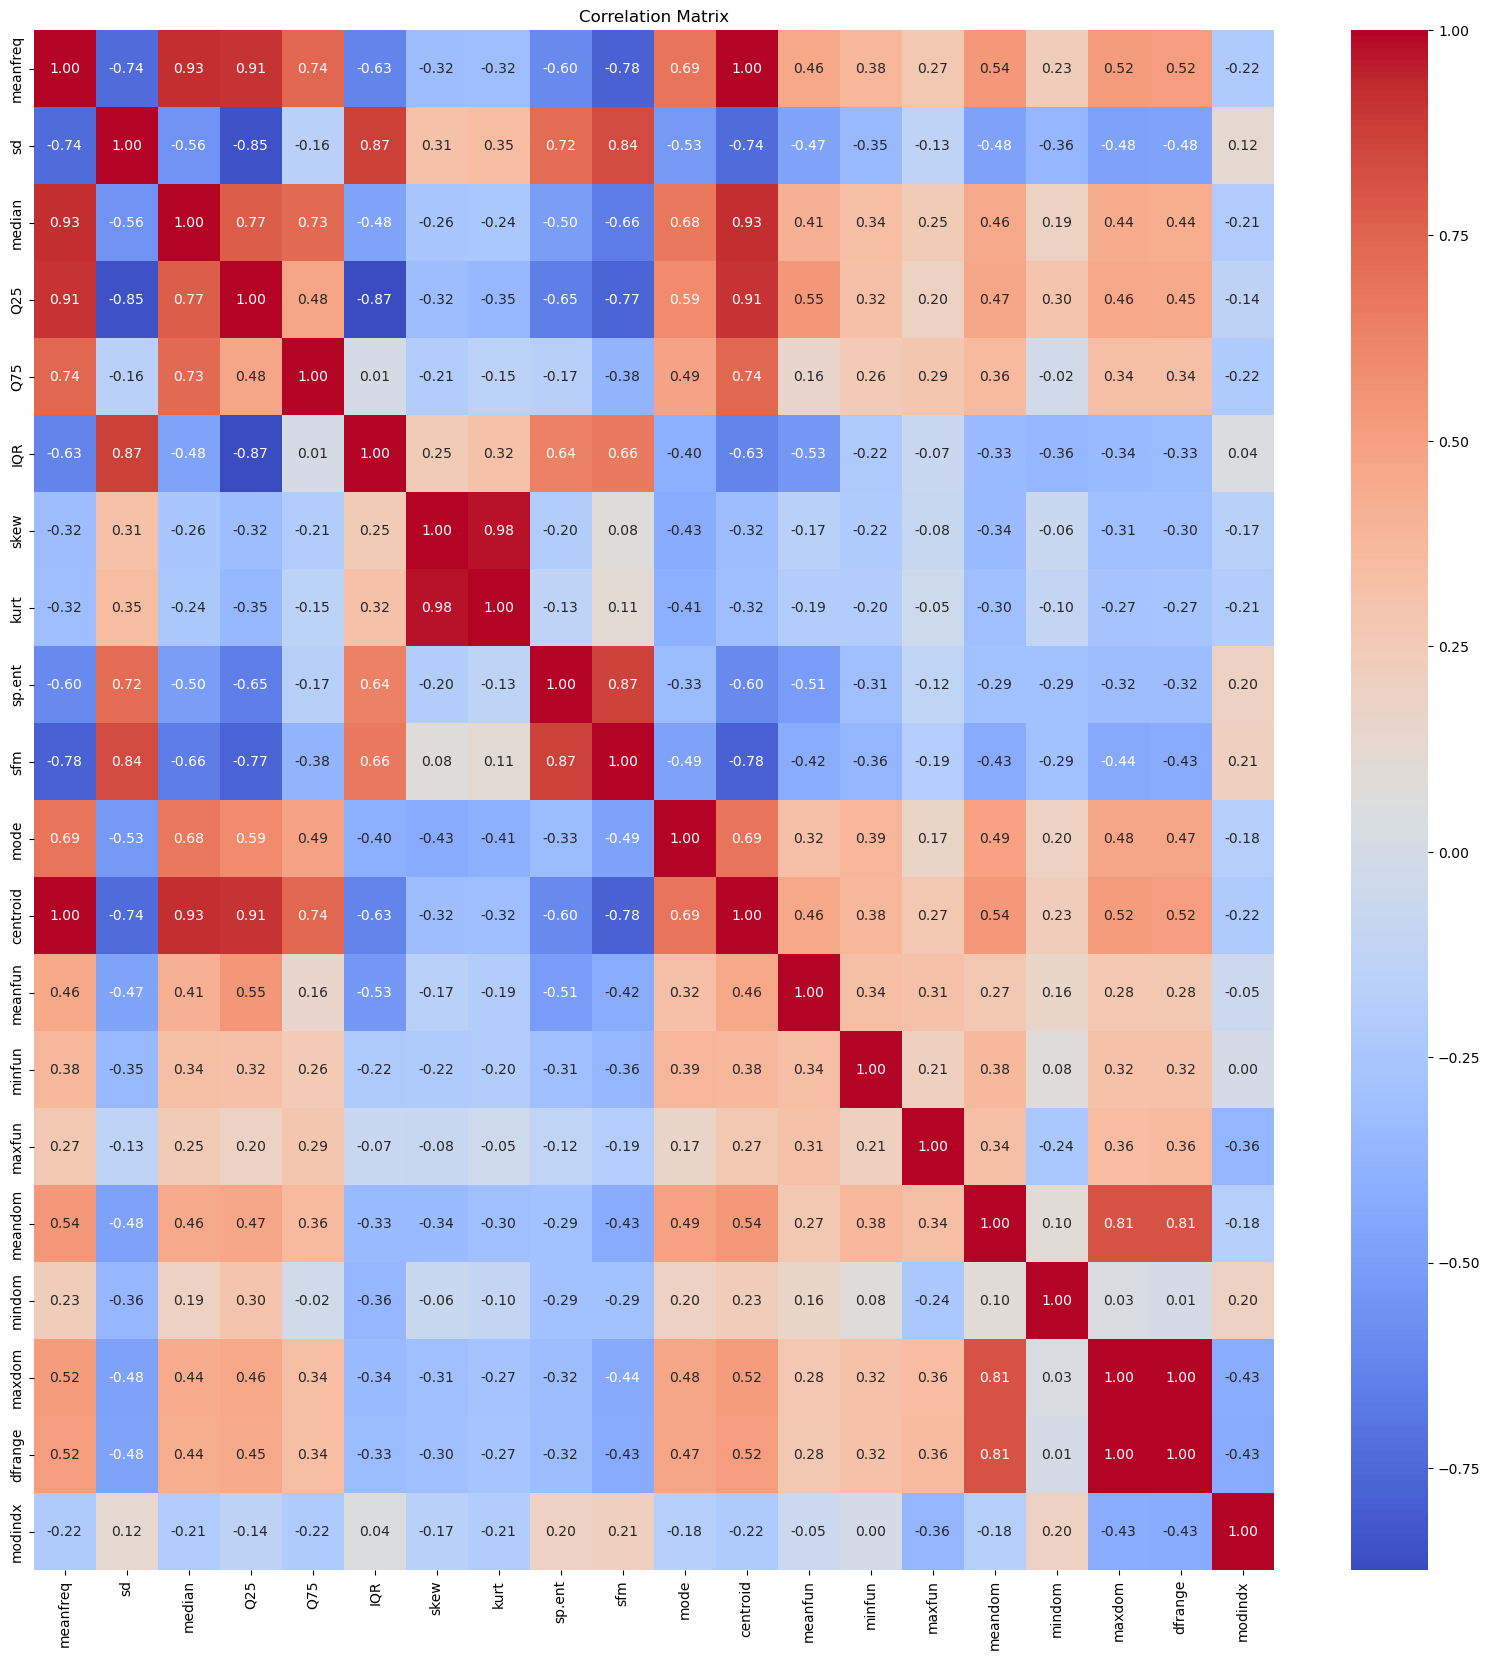

In [22]:
# Melihat korelasi data
correlation = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Membuang data yang kurang berkorelasi dengan data lainnya
data_new = df.drop(columns=['meanfun', 'modindx', 'mindom', 'maxfun', 'minfun'])
data_new.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meandom,maxdom,dfrange,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.007812,0.007812,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.009014,0.054688,0.046875,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.007990,0.015625,0.007812,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.201497,0.562500,0.554688,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.712812,5.484375,5.476562,male


In [24]:
# Mengelompokkan variabel dependen dan variabel independen
X = data_new.drop(columns=['label'])
y = data_new['label']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Bagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Skala fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Latih model SVM pada data pelatihan
svm_model.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred = svm_model.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model SVM: {accuracy * 100:.2f}%\n')

# Menampilkan classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Akurasi Model SVM: 90.96%

              precision    recall  f1-score   support

      female       0.97      0.84      0.90       457
        male       0.87      0.98      0.92       494

    accuracy                           0.91       951
   macro avg       0.92      0.91      0.91       951
weighted avg       0.92      0.91      0.91       951



2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
   - Menggunakan data spam.csv
   - Fitur CountVectorizer dengan mengaktifkan stop_words
   - Evaluasi hasilnya

In [30]:
# Membaca data
df = pd.read_csv('./data/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
# Membuang kolom yang tidak digunakan
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
# Impor pustaka yang diperlukan
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Bagi data menjadi fitur (X) dan label (y)
X = df['SMS']
y = df['Labels']

# Bagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat CountVectorizer dengan penghapusan stop words
vectorizer = CountVectorizer(stop_words='english')

# Mengubah teks SMS menjadi vektor fitur
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Inisialisasi model Multinomial Naive Bayes
nb_model = MultinomialNB()

# Melatih model pada data pelatihan
nb_model.fit(X_train_vec, y_train)

# Melakukan prediksi pada data pengujian
y_pred = nb_model.predict(X_test_vec)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

# Menampilkan evaluasi lebih lanjut
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi Model: 98.39%
Confusion Matrix:
 [[944   5]
 [ 13 153]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       949
        spam       0.97      0.92      0.94       166

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
   - Menggunakan data spam.csv
   - Fitur TF-IDF dengan mengaktifkan stop_words
   - Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
   - Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat TF-IDF Vectorizer dengan penghapusan stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Mengubah teks SMS menjadi vektor fitur TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Multinomial Naive Bayes dengan TF-IDF
nb_model_tfidf = MultinomialNB()

# Melatih model pada data pelatihan yang menggunakan TF-IDF
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Melakukan prediksi pada data pengujian yang menggunakan TF-IDF
y_pred_tfidf = nb_model_tfidf.predict(X_test_tfidf)

# Mengukur akurasi model yang menggunakan TF-IDF
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'Akurasi Model dengan TF-IDF: {accuracy_tfidf * 100:.2f}%')

# Menampilkan evaluasi lebih lanjut
print("Confusion Matrix dengan TF-IDF:\n", confusion_matrix(y_test, y_pred_tfidf))
print("\nClassification Report dengan TF-IDF:\n", classification_report(y_test, y_pred_tfidf))


Akurasi Model dengan TF-IDF: 96.59%
Confusion Matrix dengan TF-IDF:
 [[949   0]
 [ 38 128]]

Classification Report dengan TF-IDF:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       949
        spam       1.00      0.77      0.87       166

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.96      1115



Kesimpulan : 
- Pada kasus data spam.csv, fitur CountVectorizer lebih baik dibandingkan dengan fitur TF-IDF karena nilai akurasinya lebih tinggi.
- CountVectorizer adalah metode yang digunakan untuk menghitung berapa kali suatu kata muncul dalam dokumen. Hal ini dilakukan dengan mengubah dokumen menjadi vektor.